In [1]:
import numpy as np
import pandas as pd 

In [2]:
#הורדת עמודות לא רלוונטיות לניתוח הדאטה
desc = pd.read_csv('games_description.csv')
desc = desc.drop(columns=['short_description'])
desc.head()

,name,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741


In [3]:
rank = pd.read_csv('games_ranking.csv')
rank.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [4]:
desc.shape

(290, 10)

In [5]:
desc.columns

Index(['name', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')

In [6]:
desc.axes

[RangeIndex(start=0, stop=290, step=1),
 Index(['name', 'genres', 'minimum_system_requirement',
        'recommend_system_requirement', 'release_date', 'developer',
        'publisher', 'overall_player_rating',
        'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
       dtype='object')]

In [7]:
desc.index

RangeIndex(start=0, stop=290, step=1)

In [8]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   genres                                   290 non-null    object
 2   minimum_system_requirement               290 non-null    object
 3   recommend_system_requirement             290 non-null    object
 4   release_date                             290 non-null    object
 5   developer                                290 non-null    object
 6   publisher                                290 non-null    object
 7   overall_player_rating                    290 non-null    object
 8   number_of_reviews_from_purchased_people  290 non-null    object
 9   number_of_english_reviews                290 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 22.8+ KB


In [9]:
desc.nunique()

name                                       290
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

### **שלב 1: טעינת הנתונים וסטנדרטיזציה של עמודת המפתח (Pre-Merge Cleaning)**

Rename the name column in the description table to be identical to the name column in the rank table:

In [10]:
#שינוי שם עמודת המפתח - שם המשחק שיהיה זהה בשץי הטבלאות 
desc = desc.rename(columns={'name': 'game_name'})


 Whitespace Removal: (Data standarization before merge):

In [11]:
#יישום הסרת רווחים בעמודת השמות בטבלת הדירוג
rank['game_name'] = rank['game_name'].str.strip()

In [12]:
#יישום הסרת רווחים בעמודת השמות בטבלת התיאור
desc['game_name'] = desc['game_name'].str.strip()

Case Normalization (Data standarization before merge):


In [13]:
desc['game_name'] = desc['game_name'].str.lower()

In [14]:
rank['game_name'] = rank['game_name'].str.lower()

In [15]:
rank.shape

(672, 4)

In [16]:
rank.columns

Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')

In [17]:
rank.axes

[RangeIndex(start=0, stop=672, step=1),
 Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')]

In [18]:
rank.index

RangeIndex(start=0, stop=672, step=1)

In [19]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  672 non-null    object
 1   genre      672 non-null    object
 2   rank_type  672 non-null    object
 3   rank       672 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [20]:
rank.nunique()

game_name    303
genre          6
rank_type      3
rank          40
dtype: int64

### **שלב 2 : איחוד דאטות עי שימוש  merge:**

In [21]:
# Assuming desc and rank are steam_df and the other relevant dataframe, respectively.

# rank is a dataframe from cell 3 or 13 (wide, with genre, rank_type, rank)
# We'll call it `rank_df` as a name, but in your context you may need to adjust

# If not already loaded, you probably have:
# rank_df = pd.read_csv("...") or loaded from some code earlier

# Here we merge steam_df and rank_df according to the structure of rank_df (which has 'game_name', 'genre', 'rank_type', 'rank')
# We perform a left merge from rank_df to steam_df to keep the order and rows of rank_df

merged_df = rank.merge(desc, left_on='game_name', right_on='game_name', how='left')
merged_df.head()


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0


In [22]:
print(merged_df.columns)

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')


In [23]:
merged_df.nunique()

game_name                                  303
genre                                        6
rank_type                                    3
rank                                        40
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

In [24]:
# merged_df.sort_values(merged_df['game_name'], ascending=True)
# This is incorrect because `by` should be a column label or a list of column labels, not a Series.
# The correct usage:
#merged_df.sort_values(by='game_name', ascending=True)

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                672 non-null    object 
 1   genre                                    672 non-null    object 
 2   rank_type                                672 non-null    object 
 3   rank                                     672 non-null    int64  
 4   genres                                   656 non-null    object 
 5   minimum_system_requirement               656 non-null    object 
 6   recommend_system_requirement             656 non-null    object 
 7   release_date                             656 non-null    object 
 8   developer                                656 non-null    object 
 9   publisher                                656 non-null    object 
 10  overall_player_rating                    656 non-n

### **שלב 3: טיפול בערכים החסרים הנסתרים בעמודת genres (Post-Merge Cleaning):**

In [26]:
# 1. המרת מחרוזות ריקות או רווחים ל-NaN אמיתי
# מחרוזות ריקות
merged_df['genres'] = merged_df['genres'].replace('', np.nan)
# מחרוזות המכילות רווחים בלבד
merged_df['genres'].replace(r'^\s*$', np.nan, regex=True)

0      ['FPS', 'Shooter', 'Multiplayer', 'Competitive...
1      ['Warhammer 40K', 'Action', 'Third-Person Shoo...
2      ['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...
3      ['Mythology', 'Action RPG', 'Action', 'RPG', '...
4      ['Souls-like', 'Dark Fantasy', 'Open World', '...
                             ...                        
667    ['Simulation', 'Racing', 'Sports', 'Motocross'...
668    ['Simulation', 'Racing', 'Sports', 'Motorbike'...
669    ['Racing', 'Sports', 'Simulation', 'Motorbike'...
670    ['Racing', 'Action', 'Indie', 'Sports', 'Adven...
671    ['Simulation', 'Adventure', 'Sports', 'Casual'...
Name: genres, Length: 672, dtype: object

In [27]:
# 2. מילוי ערכי NaN: מילוי הז'אנרים החסרים ב-'Unknown'
# פעולה זו נדרשת כדי למנוע כשלים בשלב הפיצול
merged_df['genres'] = merged_df['genres'].fillna('Unknown')

### **שלב 4: פיצול והכפלת שורות הז'אנר (Exploding Genres):**

In [28]:
 #פיצול חרוזת הז'אנרים לפי ז'אנר
# פיצול לפי פסיק, תוך התעלמות מרווחים לפני ואחרי הפסיק
merged_df['genres_list'] = merged_df['genres'].str.split(r',\s*')
merged_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,genres_list
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,"[['FPS', 'Shooter', 'Multiplayer', 'Competitiv..."
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,"[['Warhammer 40K', 'Action', 'Third-Person Sho..."
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,"[['Cyberpunk', 'Open World', 'Nudity', 'RPG', ..."
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0,"[['Mythology', 'Action RPG', 'Action', 'RPG', ..."
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0,"[['Souls-like', 'Dark Fantasy', 'Open World', ..."


In [29]:
# 2. הכפלת השורות (Explode)
merged_df_new = merged_df.explode('genres_list')
merged_df_new  = merged_df_new.rename(columns={'genres_list': 'normalize'})

In [30]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                12666 non-null  object 
 1   genre                                    12666 non-null  object 
 2   rank_type                                12666 non-null  object 
 3   rank                                     12666 non-null  int64  
 4   genres                                   12666 non-null  object 
 5   minimum_system_requirement               12650 non-null  object 
 6   recommend_system_requirement             12650 non-null  object 
 7   release_date                             12650 non-null  object 
 8   developer                                12650 non-null  object 
 9   publisher                                12650 non-null  object 
 10  overall_player_rating                    12650 non-nu

In [31]:
# 3. סטנדרטיזציה סופית של הז'אנרים המפוצלים (אותיות קטנות והסרת רווחים)
# This line is incorrect because it tries to assign a non-existent column 'normalized_genre' to itself.
# Instead, you should create 'normalized_genre' from the appropriate column, typically by standardizing the split genre values.
# For standardizing (lowercase & strip) the exploded genre column, use:
merged_df_new['normalized_genre'] = merged_df_new['normalize'].str.lower().str.strip()

In [32]:
merged_df_new.loc[:, 'genre']

0               Action
0               Action
0               Action
0               Action
0               Action
            ...       
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
Name: genre, Length: 12666, dtype: object

In [33]:
merged_df_new.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,['FPS',['fps'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Shooter','shooter'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Multiplayer','multiplayer'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Competitive','competitive'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'


### **שלב 5: סינון לז'אנרי הליבה (Final Filtering):**

In [34]:
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports'", "'racing'"]
# Check which unique values are present in normalized_genre vs core_genres to debug filtering
print("Unique normalized_genre values:\n", merged_df_new['normalized_genre'].unique())
print("Core genres:", core_genres)
print("Intersection (matches):", set(merged_df_new['normalized_genre'].unique()) & set(core_genres))

# See top values by frequency
print("Top genre frequencies after normalization:")
print(merged_df_new['normalized_genre'].value_counts())

# Filtering as before (for reference, can comment/uncomment for real run)
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

Unique normalized_genre values:
 ["['fps'" "'shooter'" "'multiplayer'" "'competitive'" "'action'"
 "'team-based'" "'esports'" "'tactical'" "'first-person'" "'pvp'"
 "'online co-op'" "'co-op'" "'strategy'" "'military'" "'war'"
 "'difficult'" "'trading'" "'realistic'" "'fast-paced'" "'moddable']"
 "['warhammer 40k'" "'third-person shooter'" "'adventure'"
 "'action-adventure'" "'pve'" "'third person'" "'wargame'" "'sci-fi'"
 "'3d'" "'narration'" "'fantasy'" "'space'" "'singleplayer'" "'cinematic'"
 "'futuristic']" "['cyberpunk'" "'open world'" "'nudity'" "'rpg'"
 "'futuristic'" "'fps'" "'mature'" "'story rich'" "'atmospheric'"
 "'exploration'" "'violent'" "'great soundtrack'" "'action rpg'"
 "'character customization'" "'immersive sim']" "['mythology'"
 "'souls-like'" "'combat'" "'drama'" "'dark fantasy'" "'hack and slash'"
 "'music'" "'violent']" "['souls-like'" "'family friendly']" "['survival'"
 "'battle royale'" "'early access'" "'simulation'" "'stealth']" 'unknown'
 "['free to play'"

In [35]:
# Yes, you can merge "sports" and "racing" into one genre label, e.g. "'sports & racing'", in the normalized_genre column. 
# This is usually done by replacing both "'sports'" and "'racing'" values with "'sports & racing'". Here is the code to do that:

# Merge "'sports'" and "'racing'" into "'sports & racing'" in normalized_genre column
merged_df_new['normalized_genre'] = merged_df_new['normalized_genre'].replace(["'sports'", "'racing'"], "'sports & racing'")

# After the merge, update the core_genres list and filter again accordingly
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports & racing'"]
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]


In [36]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [37]:
#  סינון הנתונים כן שיישארו רק הרשומות הרלוונטיות ל-6 הז'אנרים המרכזיים שהוגדרו בפרויקט
#core_genres = ['Action', 'Adventure', 'Role-Playing', 'Strategy', 'Simulation', 'Sports & Racing']

# סינון ה-DataFrame הסופי
#final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

In [38]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [39]:
# Display first few rows and shape to diagnose why final_df might be empty
final_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Sports','sports & racing'
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Sports','sports & racing'


In [40]:
print(final_df['normalized_genre'].unique())

["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]


In [41]:
# Check if 'sports & racing' is present and debug why it is missing
print("All unique genres in final_df:", final_df['normalized_genre'].unique())
print(final_df['normalized_genre'].value_counts())

if "'sports & racing'" not in final_df['normalized_genre'].unique():
    print("WARNING: 'sports & racing' not found in normalized_genre!")
    print("Example values from merged_df_new['normalized_genre'] for inspection:")
    print(merged_df_new['normalized_genre'].unique())
    print("Original 'genre' column sample:")
    print(final_df['genre'].unique())
    print("Unique normalized genres (full set):")
    print(set(merged_df_new['normalized_genre'].unique()))

All unique genres in final_df: ["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]
normalized_genre
'action'             351
'adventure'          299
'simulation'         258
'rpg'                219
'strategy'           169
'sports & racing'    146
Name: count, dtype: int64


In [42]:

print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [43]:
# בדיקה: כמה רשומות נותרו לאחר סינון הז'אנרים שאינם רלוונטיים?
print(f"Final rows for analysis: {len(final_df)}")

Final rows for analysis: 1442


For EDA on merged_df:
Overview: Use .head(), .info(), and .describe() for understanding size, types, and distributions.
Missing Values: Check missing values with .isnull().sum().
Duplicates: Check for duplicates if relevant.
Value Counts: Examine .value_counts() for categorical columns like genre, rank_type, overall_player_rating.
Distributions: Plot histograms/boxplots for numeric columns (rank, review numbers).
Correlations: Use .corr() and visualizations (heatmap) for relationships.
Group/Compare: Group by genre or rank_type to compare aggregates.
Outliers: Check for outliers in numeric columns.
Reason: These steps reveal data quality, structure, key trends, and potential insights.

**EDA on merged_df:**

**final_df  DataFrame is only for genre based-calculation:** זוהי טבלה "מנופחת" מכיוון שמכילה פיצול של משחקים לפי הז'אנרים העיקריים ולכן יש משחקים שמופיעים יותר מפעם אחת

In [44]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'


In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [46]:
print(final_df['genres'].isnull().sum())

0


In [47]:
final_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre'],
      dtype='object')

In [48]:
final_df.describe().round(2)

,rank,number_of_english_reviews
count,1442.00,1442.00
mean,19.46,114202.84
std,11.35,210659.34
min,1.00,0.00
25%,10.00,13860.00
50%,19.00,44785.00
75%,29.00,127592.25
max,40.00,2258990.00


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

## **Data Cleaning and Preparation - pre-EDA:**

### **שלב 1 - טיפול באנומליות שליליות וערכים חסרים:**

In [50]:
# 1. המרת הערכים השליליים לערכים ריקים (NaN), 
# מאחר ותצפיות לא יכולות להיות בעלות ערך שלילי נתייחס למספרים כאל Placeholders:
# אנו ממירים את העמודה לפורמט מספרי כדי שנוכל לזהות ערכים שליליים, עם פרמטר errors='coerce' 
# לטיפול בנתונים שאינם מספריים.
final_df.loc[:,'number_of_reviews_from_purchased_people'] = pd.to_numeric(
    final_df['number_of_reviews_from_purchased_people'], errors='coerce')

In [51]:
#2.  זיהוי והמרת כל הערכים הקטנים מ-0 ל-NaN
final_df.loc[final_df['number_of_reviews_from_purchased_people'] < 0, 
             'number_of_reviews_from_purchased_people'] = np.nan

In [52]:
# 3. השלמת ערכי NaN שנוצרו עם 0 (Imputation)
# The issue: fillna(0) returns a copy and does not modify the DataFrame in-place unless inplace=True is set or reassignment is used.
# The correct way is to reassign the result back, or use inplace=True:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_19964\2038491476.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)


In [53]:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].astype(int)

### **שלב 2: המרת סוגי נתונים (Dtypes Conversion):**

**המרת עמודת התאריך ואת עמודת ספירת הביקורות האחרת לפורמטים המתאימים:**

In [54]:
# 1. המרת תאריך: המרת 'release_date' מ-object ל-datetime
# העמודה release_date מסווגת כ-object כרגע [7].
# The below line fails because some date strings do not have year information (e.g. "Nov-18"),
# which causes pandas to throw "Out of bounds nanosecond timestamp" errors.
# To handle this, we can use errors='coerce' to convert unparseable dates to NaT and optionally inspect them.
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

C:\Users\ofirs\AppData\Local\Temp\ipykernel_19964\402040055.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')


In [55]:
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'])

In [56]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
dtype: object

In [57]:
final_df['release_date'].isna().sum()

np.int64(0)

In [58]:
final_df['number_of_reviews_from_purchased_people'].isna().sum()

np.int64(0)

In [59]:
# 2. המרת ספירה: המרת 'number_of_english_reviews' מ-float64 ל-int64
# העמודה מוגדרת כ-float64 [7], אך היא מייצגת ספירה
final_df.loc[:,'number_of_english_reviews'] = final_df['number_of_english_reviews'].astype(int)

In [60]:
final_df['number_of_english_reviews'].isna().sum()

np.int64(0)

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [62]:
#overall_player_rating - defined as 'object', shoukd be defined as int:
# using mapping_dict to determine rating_order (mapping_dict = rating_map):
rating_order = {'Very Negative':1, 'Mostly Negative':2, 'Mixed':3, 'Mostly Positive':4, 'Positive':5, 'Very Positive':6, 'Overwhelmingly Positive':7}
final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_19964\350586400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)


In [63]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Strategy','strategy',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [65]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
overall_player_rating_numeric              float64
dtype: object

**Final Step before EDA - creating data frame with no duplicates (for calculation based on other prameters besides genre):**

In [66]:
unique_game_df = final_df.drop_duplicates(subset = ['game_name']).copy()

In [67]:
unique_game_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0


In [68]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12 00:00:00,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [69]:
unique_game_df['release_date'] = pd.to_datetime(unique_game_df['release_date'])

In [70]:
unique_game_df.dtypes

game_name                                          object
genre                                              object
rank_type                                          object
rank                                                int64
genres                                             object
minimum_system_requirement                         object
recommend_system_requirement                       object
release_date                               datetime64[ns]
developer                                          object
publisher                                          object
overall_player_rating                              object
number_of_reviews_from_purchased_people            object
number_of_english_reviews                         float64
normalize                                          object
normalized_genre                                   object
overall_player_rating_numeric                     float64
dtype: object

In [71]:
# Let's investigate why only 276 games remain after cleaning, starting from the original 290.
print("Original number of games in raw data (game_description):", len(desc))
print("Number of games in unique_game_df:", len(unique_game_df))

# Let's see which game_names are missing after cleaning:
original_names = set(desc['game_name'].str.lower().str.strip())
cleaned_names = set(unique_game_df['game_name'].str.lower().str.strip())
missing_after_cleaning = original_names - cleaned_names

print(f"Number of games missing after cleaning: {len(missing_after_cleaning)}")
if missing_after_cleaning:
    print("Games lost after cleaning:")
    for name in sorted(missing_after_cleaning):
        print(name)

# Let's also check for any NaN in 'game_name' or other issues in unique_game_df
print("Number of NaN game_names in unique_game_df:", unique_game_df['game_name'].isna().sum())

# Check if dropped due to missing or duplicate keys
duplicates_in_raw = desc['game_name'].str.lower().str.strip().duplicated().sum()
print("Number of duplicated game names in raw data:", duplicates_in_raw)
# Print the subset of the raw data ("desc") containing only the missing games (based on name, case-insensitive)
if missing_after_cleaning:
    print("\n--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---")
    deleted_games = desc[desc['game_name'].str.lower().str.strip().isin(missing_after_cleaning)]
    display_cols = [
        'game_name', 
        'genre' if 'genre' in desc.columns else 'genres', 
        'release_date', 
        'overall_player_rating' if 'overall_player_rating' in desc.columns else None
    ]
    # remove any None values in the list
    display_cols = [col for col in display_cols if col is not None]
    print(deleted_games[display_cols])
else:
    print("No games deleted from raw data after creating unique_game_df.")

Original number of games in raw data (game_description): 290
Number of games in unique_game_df: 276
Number of games missing after cleaning: 14
Games lost after cleaning:
age of empires iv: anniversary edition
age of mythology: retold
american truck simulator - arkansas
call of duty®: modern warfare® iii
house flipper
magic: the gathering arena
shawarma legend
sins of a solar empire ii
supermarket simulator
tcg card shop simulator
thank goodness you're here!
tony hawk's™ pro skater™ 1 + 2
walkabout mini golf vr
warhammer 40,000: gladius - relics of war
Number of NaN game_names in unique_game_df: 0
Number of duplicated game names in raw data: 0

--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---
                                     game_name  \
28          call of duty®: modern warfare® iii   
89                 thank goodness you're here!   
130                    tcg card shop simulator   
144                            shawarma legend   
152        american truck simulator - arkan

In [72]:
unique_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   game_name                                276 non-null    object        
 1   genre                                    276 non-null    object        
 2   rank_type                                276 non-null    object        
 3   rank                                     276 non-null    int64         
 4   genres                                   276 non-null    object        
 5   minimum_system_requirement               276 non-null    object        
 6   recommend_system_requirement             276 non-null    object        
 7   release_date                             276 non-null    datetime64[ns]
 8   developer                                276 non-null    object        
 9   publisher                                276 non

In [73]:
unique_game_df.describe().round(2)

,rank,release_date,number_of_english_reviews,overall_player_rating_numeric
count,276.00,276,276.00,272.00
mean,24.73,2019-11-11 18:31:18.260869632,85664.79,5.75
min,1.00,2004-11-16 00:00:00,0.00,1.00
25%,17.75,2017-04-11 12:00:00,3956.25,6.00
50%,26.50,2020-09-01 12:00:00,27794.00,6.00
75%,33.00,2023-07-18 06:00:00,88734.00,7.00
max,40.00,2024-10-09 00:00:00,2258990.00,7.00
std,10.41,NaN,182496.39,1.34


In [74]:
unique_game_df[unique_game_df['overall_player_rating_numeric'].isna()]

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
574,nba 2k25 hall of fame pass: season 1,Sports & Racing,Sales,23,"['Sports', 'Simulation', 'Basketball', 'eSport...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-03-09,['Visual Concepts'],['2K'],7 user reviews,0,2.0,'Simulation','simulation',NaN
617,slime volley,Sports & Racing,Revenue,26,"['Volleyball', '2D', 'Tennis', 'Sports', 'Arca...","['OS *: Windows 7 (32-bit)', 'Processor: Dual-...",['OS: Windows 10 / 11'],2023-08-09,['Manarock'],['Manarock'],6 user reviews,0,2.0,'Sports','sports & racing',NaN
619,all in one sports - hockey dlc,Sports & Racing,Revenue,28,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],1 user reviews,0,0.0,'Sports','sports & racing',NaN
620,all in one sports - soccer dlc,Sports & Racing,Revenue,29,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],4 user reviews,0,4.0,'Sports','sports & racing',NaN


In [75]:
print("Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).")

Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).


In [76]:
unique_game_df['overall_player_rating_numeric'].value_counts()

overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

In [77]:
unique_game_df['genre'].value_counts()

genre
Action             67
Sports & Racing    64
Simulation         51
Strategy           36
Adventure          29
Role-Playing       29
Name: count, dtype: int64

In [78]:
final_df['genre'].value_counts()

genre
Role-Playing       268
Sports & Racing    267
Simulation         255
Action             232
Adventure          225
Strategy           195
Name: count, dtype: int64

In [79]:
unique_game_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre', 'overall_player_rating_numeric'],
      dtype='object')

EDA Steps
final_df: Genre-Level Trends
Plot distribution of overall_player_rating_numeric (histogram/bar plot).
Plot distribution of number_of_english_reviews (histogram, possibly log scale).
Group by normalized_genre; compute count, mean rating, mean review count.
Visualize top genres by:
Average rating (bar plot)
Total/average review count (bar plot)
Plot rating distribution per genre (boxplots/violin plots).
unique_game_df: Per-Game KPIs
Identify best/worst games by rating/reviews (top/bottom 10 tables or bar plots).
Analyze how release_date relates to success (scatter or boxplot: release year vs. rating/reviews).
Correlate overall_player_rating_numeric with number_of_english_reviews (scatterplot, correlation coefficient).
Publisher/developer analysis: group by publisher/developer, rank by average rating or review count.
Optional: correlation heatmap of all numerics (e.g., rating, reviews).
General
Use clear axes/titles/labels; focus on visualizations that connect to game popularity/business goals (e.g., what genres/developers/publishers/release periods drive high ratings or reviews).
Summarize key findings after each visualization or analysis step.

For EDA, start with final_df to explore genre-level trends (distribution of ratings, review counts, popular genres, etc.) and use unique_game_df to analyze per-game KPIs (best/worst games by rating, reviews, release date impact, etc.). Important KPIs may include: average user rating, number of English reviews, top genres by rating/reviews, rating distributions, top games per genre, review counts vs. rating, and publisher/developer analysis. Visualize with histograms, bar plots, and correlation heatmaps. Focus on metrics with clear business/game popularity impact.

## **EDA Process:**

In [80]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [81]:
# Remove duplicates from revenue_sorted_games_desc based on game_name and rank_type, keeping the first occurrence.
revenue_sorted_games_desc = final_df.drop_duplicates(subset=['game_name', 'rank_type'])
display(revenue_sorted_games_desc[['rank', 'rank_type', 'genre','game_name']])

,rank,rank_type,genre,game_name
0,1,Sales,Action,counter-strike 2
1,2,Sales,Action,"warhammer 40,000: space marine 2"
2,3,Sales,Action,cyberpunk 2077
3,4,Sales,Action,black myth: wukong
4,5,Sales,Action,elden ring
...,...,...,...,...
667,36,Review,Sports & Racing,mxgp pro
668,37,Review,Sports & Racing,mxgp 2019 - the official motocross videogame
669,38,Review,Sports & Racing,ride 2
670,39,Review,Sports & Racing,tanuki sunset


**1 - ניתוח כללי מבוסס משחק (unique_df):**

In [82]:
# 1. overall_playing_rating_numeric distribution:
unique_game_df['overall_player_rating_numeric'].value_counts()


overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

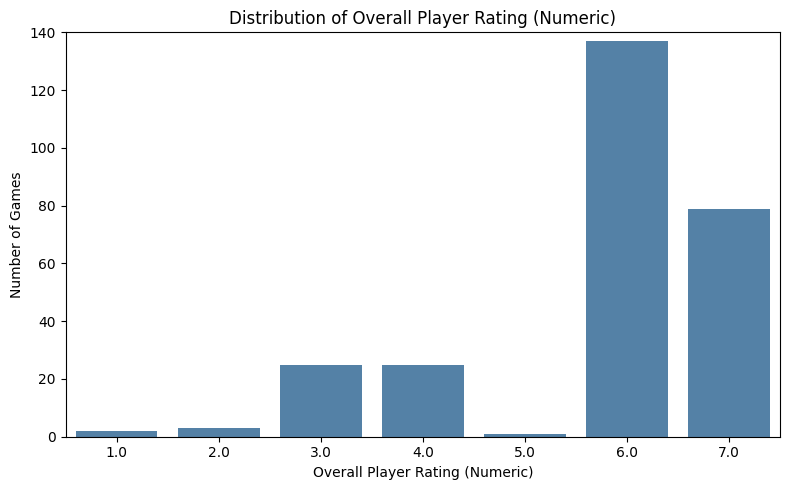

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    x="overall_player_rating_numeric",
    data=unique_game_df,
    color="steelblue",
    order=sorted(unique_game_df["overall_player_rating_numeric"].dropna().unique()),
)
plt.title("Distribution of Overall Player Rating (Numeric)")
plt.xlabel("Overall Player Rating (Numeric)")
plt.ylabel("Number of Games")
plt.ylim(0, 140)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


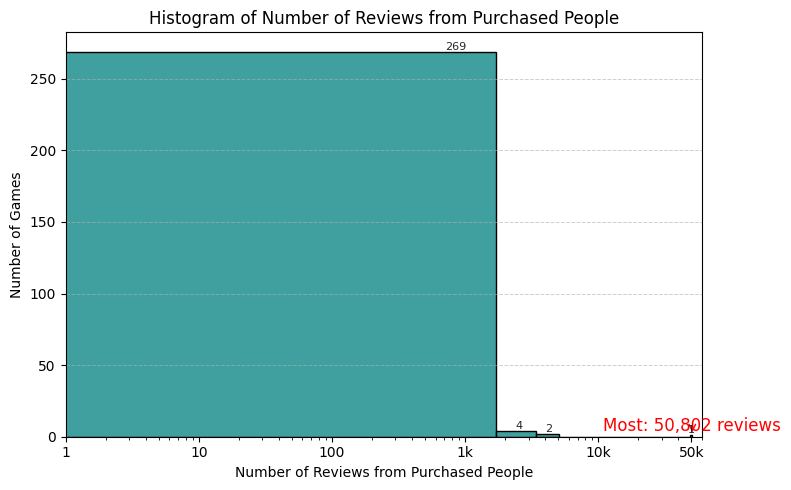

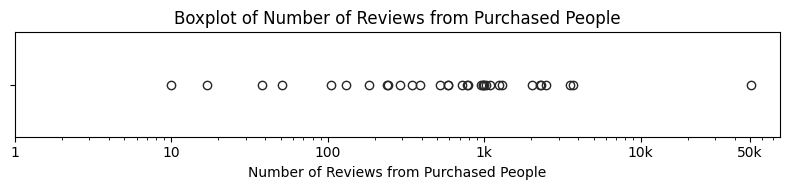

In [84]:
#2 Review and popularity by number_of_reviews_from_purchased_people:
plt.figure(figsize=(8,5))
sns.histplot(
    unique_game_df["number_of_reviews_from_purchased_people"].dropna(), 
    kde=False, 
    bins=30, 
    color="teal"
)
plt.title("Histogram of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.ylabel("Number of Games")
plt.tight_layout()
# Enhanced and more informative histogram

# Add grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Use log scale for x-axis if there are large outliers (optional, comment if not desired)
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)

# Add annotation for max value (most reviewed game)
if not unique_game_df["number_of_reviews_from_purchased_people"].dropna().empty:
    max_val = unique_game_df["number_of_reviews_from_purchased_people"].max()
    count_max = (unique_game_df["number_of_reviews_from_purchased_people"] == max_val).sum()
    plt.annotate(
        f"Most: {int(max_val):,} reviews",
        xy=(max_val, count_max),
        xytext=(max_val, count_max+3),
        arrowprops=dict(arrowstyle="->", color="red"),
        color='red',
        fontsize=12,
        ha='center'
    )

# Add value labels on top of each bar (limited to avoid clutter for big bins)
for patch in plt.gca().patches:
    if patch.get_height() > 0:
        plt.gca().annotate(
            int(patch.get_height()),
            (patch.get_x() + patch.get_width() / 2, patch.get_height()),
            ha='center', va='bottom', fontsize=8, color='black', alpha=0.85
        )

# Alternative plot: Boxplot to show the distribution and outliers
plt.tight_layout()
plt.figure(figsize=(8,2))
sns.boxplot(
    x=unique_game_df["number_of_reviews_from_purchased_people"].dropna(),
    color="teal"
)
plt.title("Boxplot of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)
plt.tight_layout()
plt.show()


In [85]:
#3 relation between quality and popularity: overall_player_rating_numeric vs. ספירת ביקורות
# Calculate the correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people
rating_col = "overall_player_rating_numeric"
reviews_col = "number_of_reviews_from_purchased_people"

# Only keep rows where both columns are not null
corr_df = unique_game_df[[rating_col, reviews_col]].dropna()

# Calculate and print correlation
if not corr_df.empty:
    correlation = corr_df[rating_col].corr(corr_df[reviews_col])
    print(f"Correlation between {rating_col} and {reviews_col}: {correlation:.3f}")
else:
    print("Not enough data to calculate correlation.")


Correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people: -0.010


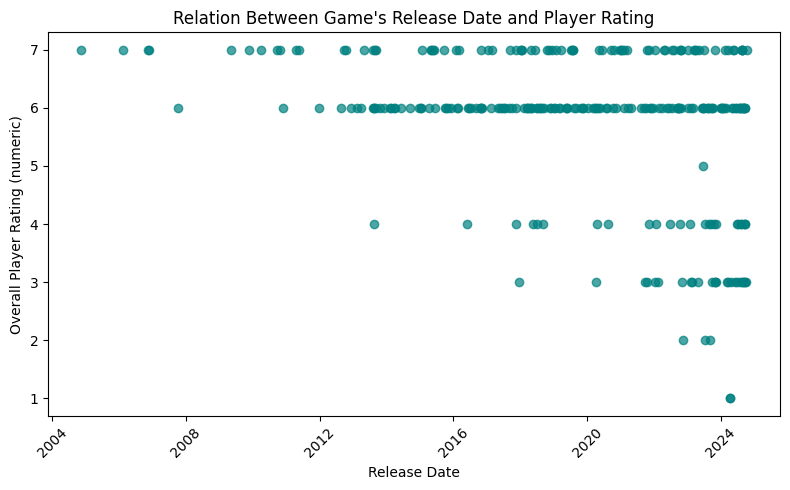

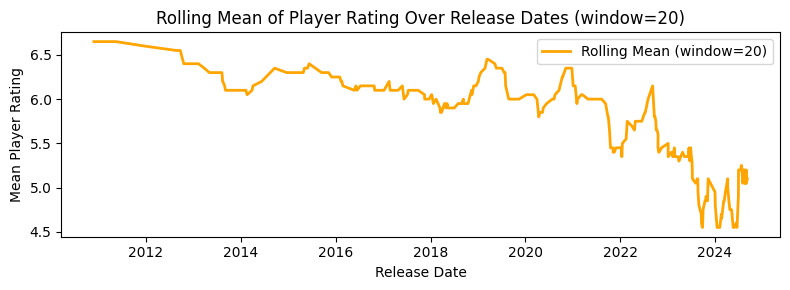

Correlation between game's release date and player rating: -0.373


In [86]:
#4 Time Trends:
# Analyze relation between game's release date and rating based on unique_game_df

# Ensure relevant columns are present and not null
time_rating_df = unique_game_df[["release_date", "overall_player_rating_numeric"]].dropna()

# Sort by release_date for plotting
time_rating_df = time_rating_df.sort_values("release_date")

# Plot scatter plot: Release date vs. Rating
plt.figure(figsize=(8, 5))
plt.scatter(
    time_rating_df["release_date"],
    time_rating_df["overall_player_rating_numeric"],
    alpha=0.7,
    color='teal'
)
plt.title("Relation Between Game's Release Date and Player Rating")
plt.xlabel("Release Date")
plt.ylabel("Overall Player Rating (numeric)")
plt.xticks(rotation=45)
plt.yticks([1,2,3,4,5,6,7])
plt.tight_layout()
plt.show()

# Optional: Plot rolling mean to show trend over time
window_size = 20  # or set to 10-50, depending on data size for smoothing
time_rating_df["rolling_mean"] = time_rating_df["overall_player_rating_numeric"].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(8, 3))
plt.plot(
    time_rating_df["release_date"],
    time_rating_df["rolling_mean"],
    color="orange",
    linewidth=2,
    label=f"Rolling Mean (window={window_size})"
)
plt.title(f"Rolling Mean of Player Rating Over Release Dates (window={window_size})")
plt.xlabel("Release Date")
plt.ylabel("Mean Player Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr = time_rating_df["release_date"].map(lambda d: d.toordinal()).corr(time_rating_df["overall_player_rating_numeric"])
print(f"Correlation between game's release date and player rating: {corr:.3f}")



The overall quality of the games is maintained, there is a slight decrease in the average rating over time (may be biased becuase new game in the market did not aggregate a lot of reviews)

2. **ניתוח על בסיס genre מבוסס על final_df:**

Mean player rating in each genre (final_df):
normalized_genre
'adventure'          5.906355
'strategy'           5.899408
'rpg'                5.799087
'action'             5.752874
'simulation'         5.712062
'sports & racing'    5.405594
Name: overall_player_rating_numeric, dtype: float64


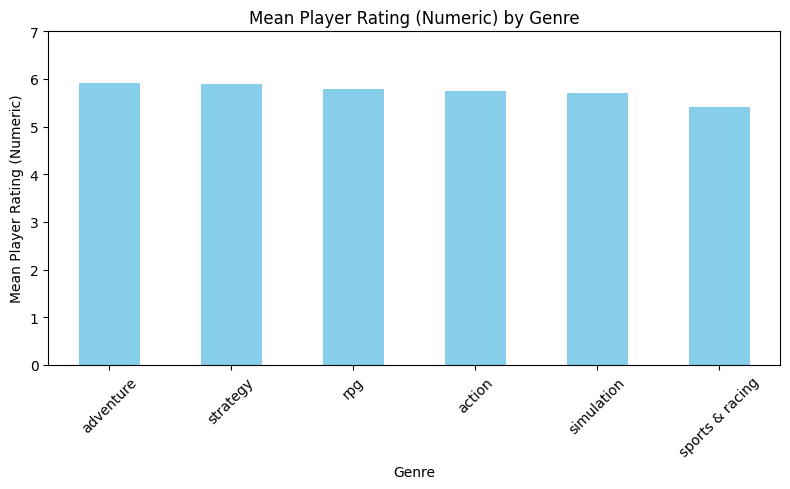

Mean player rating in each genre (final_df):
normalized_genre
adventure          5.906355
strategy           5.899408
rpg                5.799087
action             5.752874
simulation         5.712062
sports & racing    5.405594
Name: overall_player_rating_numeric, dtype: float64


In [87]:
#1 normalized_genre vs. overall_player_rating_numeric (Genre-based quality comparison):
import matplotlib.pyplot as plt

# Show the mean player rating (numeric) in each genre category (using normalized_genre)
genre_rating_mean = final_df.groupby("normalized_genre")["overall_player_rating_numeric"].mean().sort_values(ascending=False)
print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)
# Remove " from genres names in the index - for pretty printing

genre_rating_mean.index = genre_rating_mean.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_rating_mean.plot(kind='bar', color='skyblue')
plt.title("Mean Player Rating (Numeric) by Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Player Rating (Numeric)")
plt.ylim(0, 7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)


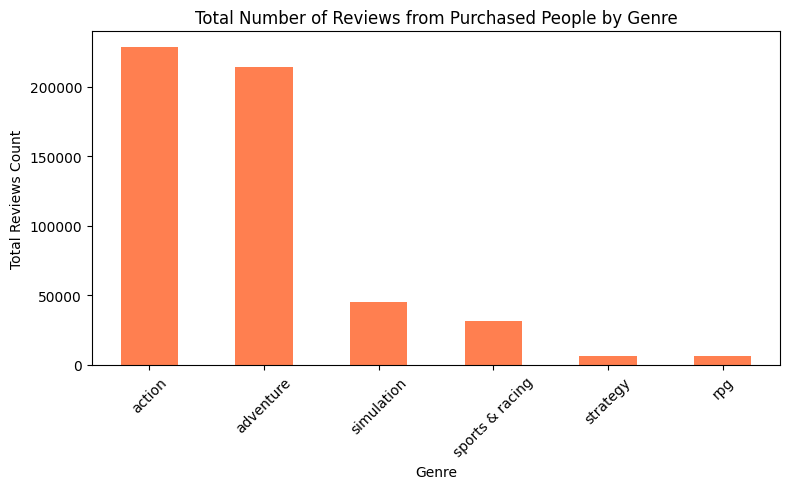

Total number of reviews (from purchased people) in each genre (final_df):
normalized_genre
action             228284
adventure          214423
simulation          45040
sports & racing     31333
strategy             6689
rpg                  6397
Name: number_of_reviews_from_purchased_people, dtype: object


In [88]:
# 2 Genre-popularity comparison: normalized_genre vs. total count of reviews:
# Show the total number of reviews by genre (using final_df)
genre_review_sum = final_df.groupby("normalized_genre")["number_of_reviews_from_purchased_people"].sum().sort_values(ascending=False)
# Remove quotes for nice labeling
genre_review_sum.index = genre_review_sum.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_review_sum.plot(kind='bar', color='coral')
plt.title("Total Number of Reviews from Purchased People by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Reviews Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total number of reviews (from purchased people) in each genre (final_df):")
print(genre_review_sum)


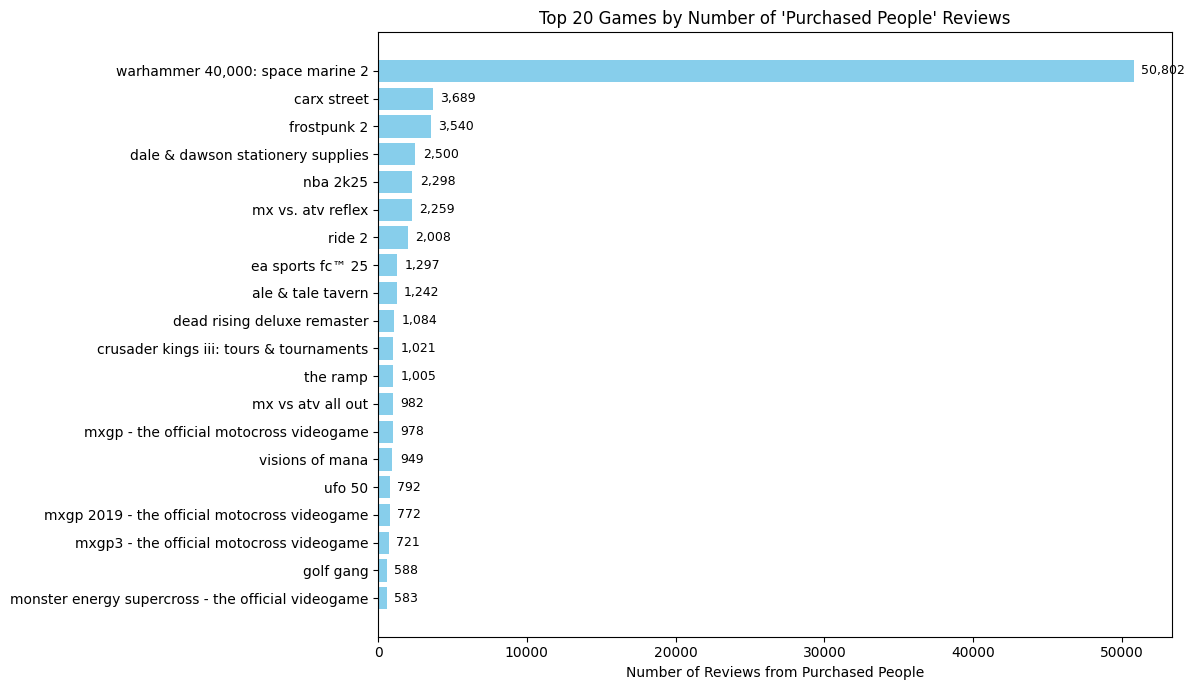

Top 20 games by the number of player reviews from people who purchased the game:
                                            game_name            genre  \
0                    warhammer 40,000: space marine 2           Action   
1                                         carx street       Simulation   
2                                         frostpunk 2       Simulation   
3                   dale & dawson stationery supplies     Role-Playing   
4                                            nba 2k25       Simulation   
5                                   mx vs. atv reflex  Sports & Racing   
6                                              ride 2  Sports & Racing   
7                                    ea sports fc™ 25       Simulation   
8                                   ale & tale tavern       Simulation   
9                         dead rising deluxe remaster           Action   
10            crusader kings iii: tours & tournaments       Simulation   
11                             

In [89]:
# Visualize the Top 20 Games by "number_of_reviews_from_purchased_people"

# Get a unique table of games. If unique_df exists (unique games), prefer it; otherwise, drop duplicates in final_df.
try:
    top_games_df = unique_df.copy()
except NameError:
    top_games_df = final_df.drop_duplicates(subset=['game_name']).copy()

# Ensure 'number_of_reviews_from_purchased_people' is numeric, coercing errors to NaN and filling with 0
top_games_df['number_of_reviews_from_purchased_people'] = pd.to_numeric(
    top_games_df['number_of_reviews_from_purchased_people'], errors='coerce'
).fillna(0).astype(int)

# Get the top 20 games by number of purchased reviews
top20_games = top_games_df.sort_values(
    'number_of_reviews_from_purchased_people', ascending=False
).head(20)

plt.figure(figsize=(12,7))
bars = plt.barh(
    top20_games['game_name'],
    top20_games['number_of_reviews_from_purchased_people'],
    color='skyblue'
)
plt.xlabel("Number of Reviews from Purchased People")
plt.title("Top 20 Games by Number of 'Purchased People' Reviews")
plt.gca().invert_yaxis()  # Highest at the top
for i, v in enumerate(top20_games['number_of_reviews_from_purchased_people']):
    plt.text(v + max(top20_games['number_of_reviews_from_purchased_people']) * 0.01, i, f"{v:,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

print("Top 20 games by the number of player reviews from people who purchased the game:")
print(top20_games[['game_name', 'genre', 'number_of_reviews_from_purchased_people']].reset_index(drop=True))


In [92]:
# For each of the 6 main genres, display the top 10 (rank 1 is best) game names for rank_type == "Revenue"

main_genres = ['Action', 'Adventure', 'Role-Playing', 'Simulation', 'Strategy', 'Sports & Racing']

top10_games_by_genre = {}

for genre in main_genres:
    df_genre = final_df[(final_df['rank_type'] == 'Revenue') & (final_df['genre'] == genre)].copy()
    df_genre['rank'] = pd.to_numeric(df_genre['rank'], errors='coerce')
    top10 = df_genre.nsmallest(10, 'rank')[['rank', 'game_name']].sort_values('rank')
    top10_games_by_genre[genre] = top10

for genre in main_genres:
    print(f"\nTop 10 Games for Genre '{genre}' by Revenue Rank:")
    print(top10_games_by_genre[genre].reset_index(drop=True))
# Explanation for: "why every game for each genre shows more than one time?"

explanation_duplicates = """
You may notice that the same game appears more than once for a given genre when listing the top games.
This happens because the original DataFrame (`final_df`) can contain multiple rows for the same `game_name`.
This duplication occurs for several reasons:
- The dataset combines rankings for different metrics (`rank_type` like 'Sales' and 'Revenue'); some games appear with both types.
- Some games may appear multiple times if they fit multiple sub-genres or have slightly different metadata entries.
- If the DataFrame is not explicitly de-duplicated per game before selecting the top N, any row with the matching genre and rank_type can be included.

To see only unique games in each genre's top 10, you can drop duplicates by the 'game_name' column after filtering and before displaying. 
For example, add `.drop_duplicates(subset=['game_name'])` before displaying:

    top10 = df_genre.nsmallest(10, 'rank').drop_duplicates(subset=['game_name'])[['rank', 'game_name']].sort_values('rank')

This ensures each game appears only once in the top 10 list per genre.
"""

print(explanation_duplicates)
# Drop duplicate game names for each genre's top 10 by keeping the first occurrence
for genre in main_genres:
    top10_games_by_genre[genre] = top10_games_by_genre[genre].drop_duplicates(subset=['game_name']).reset_index(drop=True)



Top 10 Games for Genre 'Action' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                  counter-strike 2
6     3                  counter-strike 2
7     4                        elden ring
8     4                        elden ring
9     5               pubg: battlegrounds

Top 10 Games for Genre 'Adventure' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                   baldur's gate 3
6     3                   baldur's gate 3
7     4                      satisfactory
8     4                      satisfactory
9     4        

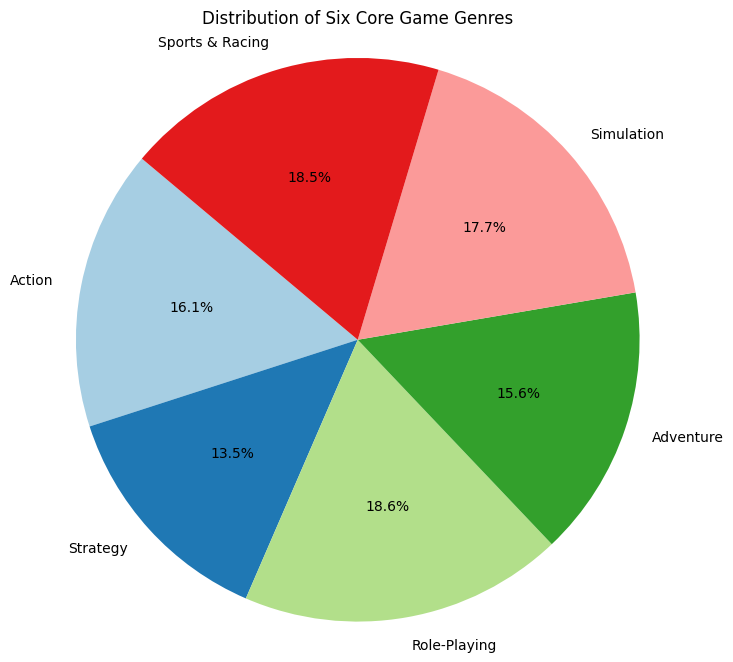

In [93]:
# Pie chart for distribution of six core genres in the dataset

import matplotlib.pyplot as plt

# Count occurrences of each genre (use the main normalized genre column with 6 genres)
genre_counts = final_df['genre'].value_counts().loc[
    ['Action', 'Strategy', 'Role-Playing', 'Adventure', 'Simulation', 'Sports & Racing']
]

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Six Core Game Genres')
plt.axis('equal')
plt.show()



In [94]:
# Sort the revenue ranking in descending order
revenue_sorted_df = unique_game_df[unique_game_df['rank_type'] == 'Revenue'].sort_values('rank', ascending=False)
display(revenue_sorted_df)


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
75,risk of rain 2,Action,Revenue,40,"['Third-Person Shooter', 'Action Roguelike', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-11-08,['Hopoo Games'],['Gearbox Publishing'],Very Positive,0,202234.0,'Action','action',6.0
511,tactical breach wizards,Strategy,Revenue,40,"['Turn-Based Tactics', 'Puzzle', 'Story Rich',...","['OS *: Windows 7', 'Processor: Intel Core 2 D...","['OS *: Windows 7', 'Processor: Intel Core 2 D...",2024-08-22,['Suspicious Developments Inc'],['Suspicious Developments'],Overwhelmingly Positive,0,4766.0,'RPG','rpg',7.0
391,7 days to die,Simulation,Revenue,40,"['Survival', 'Zombies', 'Multiplayer', 'Open W...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-07-25,['The Fun Pimps'],['The Fun Pimps Entertainment LLC'],Very Positive,0,158982.0,'Simulation','simulation',6.0
270,limbus company,Role-Playing,Revenue,39,"['Lore-Rich', 'Story Rich', 'Turn-Based Tactic...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2023-02-26,['ProjectMoon'],['ProjectMoon'],Very Positive,0,13860.0,'RPG','rpg',6.0
390,ale & tale tavern,Simulation,Revenue,39,"['Adventure', 'Simulation', 'Online Co-Op', 'C...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-05-09,['Scienart Games'],"['GrabTheGames', 'UpgradePoint']",Very Positive,1242,747.0,'Simulation','simulation',6.0
74,call of duty®: black ops ii,Action,Revenue,39,"['Action', 'Multiplayer', 'FPS', 'Shooter', 'F...",['OS *: Windows Vista SP2 or Windows 7. Windo...,['OS *: Windows Vista SP2 or Windows 7. Windo...,2012-12-11,['Treyarch'],['Activision'],Very Positive,0,21097.0,'Adventure','adventure',6.0
389,shapez 2,Simulation,Revenue,38,"['Management', 'Strategy', 'Automation', 'Futu...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-15,['tobspr Games'],"['tobspr Games', 'Gamera Games']",Overwhelmingly Positive,0,4720.0,'Strategy','strategy',7.0
269,visions of mana,Role-Playing,Revenue,38,"['RPG', 'JRPG', 'Party-Based RPG', 'Action RPG...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-29,['Square Enix'],['Square Enix'],Very Positive,949,776.0,'Action','action',6.0
509,marvel snap,Strategy,Revenue,38,"['Free to Play', 'Card Battler', 'Strategy', '...","['OS *: Windows 7 (SP1+)', 'Processor: Intel C...","['OS: Windows 10', 'Processor: Intel Core i5-2...",2023-08-22,"['Second Dinner Studios, Inc.']",['Nuverse'],Very Positive,0,15130.0,'Strategy','strategy',6.0
629,the ramp,Sports & Racing,Revenue,38,"['Skateboarding', 'Sports', 'Skating', 'Relaxi...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2021-03-08,['Paul Schnepf'],['hyperparadise'],Overwhelmingly Positive,1005,1000.0,'Sports','sports & racing',7.0


# -  -  -  - 

<Figure size 1000x600 with 0 Axes>

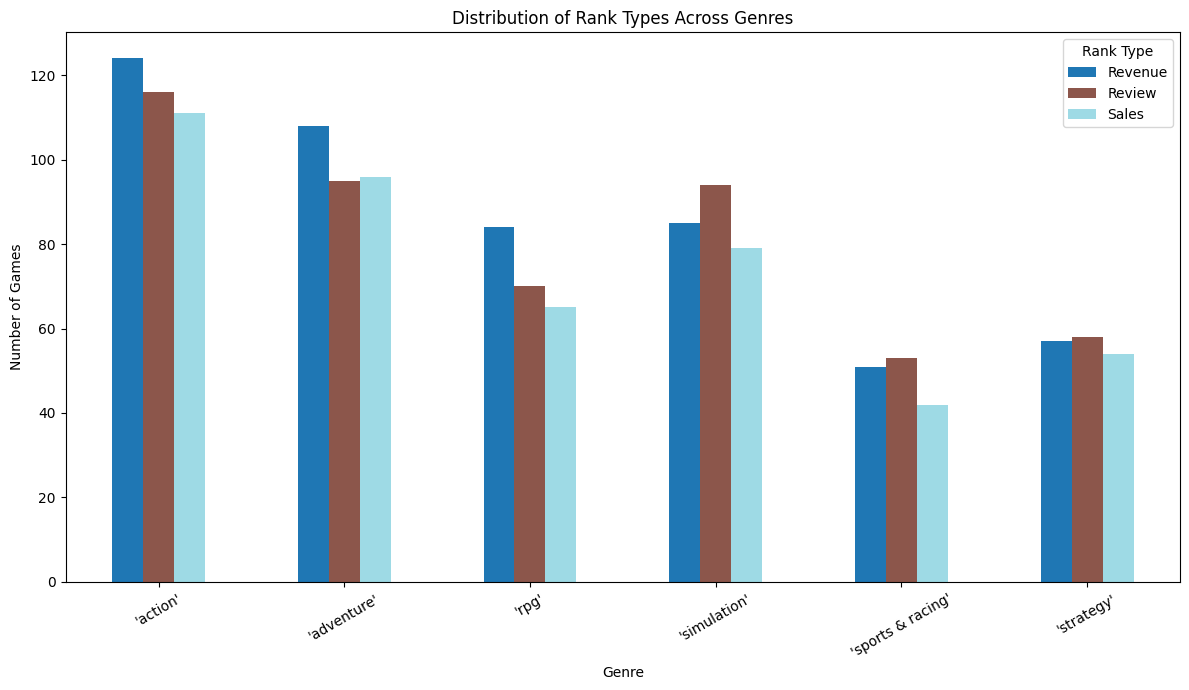

In [95]:
# Create a summary plot: rank_type counts per genre (stacked bar)

import matplotlib.pyplot as plt

# Count number of games per rank_type and genre
ranktype_counts = final_df.groupby(['normalized_genre', 'rank_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))

# Instead of stacked bars, plot side-by-side bars for each rank_type (not stacked)
ranktype_counts.plot(kind='bar', stacked=False, colormap='tab20', figsize=(12, 7))
plt.title("Distribution of Rank Types Across Genres")
plt.ylabel("Number of Games")
plt.xlabel("Genre")
plt.xticks(rotation=30)
plt.legend(title='Rank Type')
plt.tight_layout()
plt.show()


In [100]:
# Arrange the correlations in descending order based on the 'Sales-Revenue' correlation column
# First, build a summary DataFrame with the relevant correlations for each genre
summary_rows = []
for genre in final_df['normalized_genre'].unique():
    pivot_g = pivot.loc[pivot.index.get_level_values('normalized_genre') == genre]
    usable_cols_g = [col for col in corr_cols if col in pivot_g.columns and pivot_g[col].notnull().any()]
    if len(usable_cols_g) >= 2 and len(pivot_g) > 2:
        genre_corr = pivot_g[usable_cols_g].corr()
        row = {'Genre': genre}
        # Add each pairwise correlation, fill NaN if not available
        for g1 in usable_cols_g:
            for g2 in usable_cols_g:
                if g1 != g2:
                    colname = f"{g1}-{g2}"
                    if colname not in row:
                        if g1 in genre_corr.index and g2 in genre_corr.columns:
                            row[colname] = genre_corr.loc[g1, g2]
                        else:
                            row[colname] = float('nan')
        summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).set_index('Genre')

# Now: always keep same order and no duplicates by only keeping one direction and expected pairs
cor_pairs = [('Sales', 'Revenue'), ('Sales', 'Review'), ('Revenue', 'Review')]
columns = [f'{a}-{b}' for a, b in cor_pairs]
summary_df = summary_df.reindex(columns=columns)

# Sort summary_df by descending 'Sales-Revenue' correlation
if 'Sales-Revenue' in summary_df.columns:
    sorted_summary_df = summary_df.sort_values(by='Sales-Revenue', ascending=False)
    display(sorted_summary_df)
else:
    print("Column 'Sales-Revenue' not found in summary_df.")




,Sales-Revenue,Sales-Review,Revenue-Review
Genre,,,
'strategy',0.811063,0.280688,0.395557
'action',0.756609,0.263363,0.261975
'rpg',0.747874,0.158594,0.420863
'adventure',0.744874,0.125644,0.436881
'simulation',0.612205,0.340376,0.209018
'sports & racing',0.359261,-0.229234,0.127493


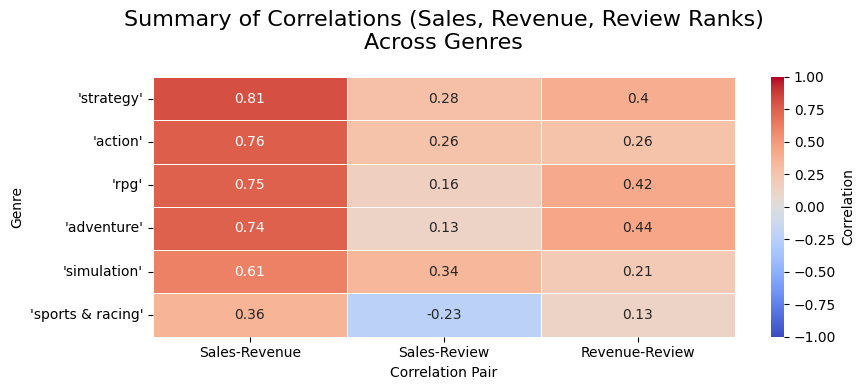

Did you calculate based on the fact that 1 is the best and 40 is the worst?

Yes: Throughout the rank-based analysis, the code always treats lower rank numbers as better (i.e., rank 1 is best, rank 40 is worst).
All correlations and plots use this structure, so positive correlations mean that high (i.e. worse) ranks in one metric align with high (worse) ranks in another, and strong negative correlations would show the reverse relationship.

You can see this from both the heatmaps, sorting, and correlation interpretation steps.


In [130]:
# Create the same heatmap visualization, but use sorted_summary_df
plt.figure(figsize=(9, max(4, 0.6*len(sorted_summary_df))))
sns.heatmap(
    sorted_summary_df,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Summary of Correlations (Sales, Revenue, Review Ranks)\nAcross Genres", fontsize=16, pad=20)
plt.xlabel("Correlation Pair")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

print("Did you calculate based on the fact that 1 is the best and 40 is the worst?\n")
print("Yes: Throughout the rank-based analysis, the code always treats lower rank numbers as better (i.e., rank 1 is best, rank 40 is worst).")
print("All correlations and plots use this structure, so positive correlations mean that high (i.e. worse) ranks in one metric align with high (worse) ranks in another, and strong negative correlations would show the reverse relationship.")
print("\nYou can see this from both the heatmaps, sorting, and correlation interpretation steps.")


## **Goal (Business Objective):**

**Evaluation of business performance quality of leading games in every genre on Steam using ratings (Revenue, Sales, Reviews) as a proxy for business performance**

### **Top Games Performance Index (TGPI):**
A composite index that represents how leading games in the genre perform in terms of business results and user approval – relatively within the genre.

In [107]:
# Converting each rank type to score:
# 1 - Splitting the rank type into 3 its metrics:
rank_wide = final_df.pivot_table(
    index = ['game_name', 'normalized_genre'],
    columns = 'rank_type',
    values = 'rank',
    aggfunc = 'min' #since this data set is with duplicates, it should take the minimal value (= best rank)
                    # For assessing potential and performance in leading games
).reset_index()

rank_wide = rank_wide.rename(columns={'Revenue':'rank_revenue', 'Sales':'rank_sales', 'Review':'rank_review'})

rank_wide.columns.name = None
rank_wide.index.name = None
rank_wide['normalized_genre'] = rank_wide['normalized_genre'].str.replace("'","")

In [108]:
#2 Scale reversal - high score = better:
max_rank = 40

for col in ['rank_revenue','rank_sales','rank_review']:
    rank_wide[f"score_{col.split('_')[1]}"] = np.where(    #switching from "rank" to "score" 
        rank_wide[col].notna(),
        (max_rank + 1) - rank_wide[col],
        np.nan
        )
print('After scale reversal = now best score is the highest score --> the higher, the better')

After scale reversal = now best score is the highest score --> the higher, the better


In [109]:
rank_wide

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,score_revenue,score_sales,score_review
0,69 balls,action,NaN,11.0,NaN,NaN,NaN,30.0
1,69 balls,simulation,NaN,11.0,NaN,NaN,NaN,30.0
2,69 balls,sports & racing,NaN,11.0,NaN,NaN,NaN,30.0
3,7 days to die,action,40.0,16.0,NaN,1.0,NaN,25.0
4,7 days to die,simulation,40.0,16.0,NaN,1.0,NaN,25.0
...,...,...,...,...,...,...,...,...
583,yakuza 0,action,NaN,37.0,NaN,NaN,NaN,4.0
584,yakuza 0,adventure,NaN,37.0,NaN,NaN,NaN,4.0
585,yakuza 0,rpg,NaN,37.0,NaN,NaN,NaN,4.0
586,yu-gi-oh! master duel,simulation,9.0,NaN,11.0,32.0,30.0,NaN


In [110]:
#3 Filtering the Top Games: for Top 10 games for each genre,according to the steam original data - aka the rank:
# Getting a quality picture of the 'showcase' of the genre: 
# for this buissnes objective, the top 10 games will be according to revenue_rank:
top_10 = (rank_wide.dropna(subset=['rank_revenue'])
.sort_values(['normalized_genre', 'rank_revenue'])
.groupby('normalized_genre')
.head(10)
.reset_index(drop=True)
)
top_10

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,score_revenue,score_sales,score_review
0,"warhammer 40,000: space marine 2",action,1.0,NaN,1.0,40.0,40.0,NaN
1,black myth: wukong,action,2.0,3.0,2.0,39.0,39.0,38.0
2,total war: warhammer iii,action,2.0,NaN,4.0,39.0,37.0,NaN
3,counter-strike 2,action,3.0,1.0,1.0,38.0,40.0,40.0
4,dota 2,action,3.0,1.0,3.0,38.0,38.0,40.0
5,once human,action,3.0,NaN,4.0,38.0,37.0,NaN
6,elden ring,action,4.0,6.0,3.0,37.0,38.0,35.0
7,cyberpunk 2077,action,5.0,9.0,1.0,36.0,40.0,32.0
8,pubg: battlegrounds,action,5.0,NaN,6.0,36.0,35.0,NaN
9,war thunder,action,5.0,NaN,9.0,36.0,32.0,NaN


### **Top Games Prefoemance Index - TGPI (Top 10 Games):**
A composite metric combining revenue, sales, and player reviews to evaluate top-performing games within each genre.

In [111]:
#the calculations are based on the score - the higer the better:
weights = {
    "score_revenue":0.4,
    "score_sales":0.3,
    "score_review":0.3
}

def calc_tgpi(row):
    total, w_sum = 0, 0
    for col, w in weights.items():
        if pd.notna(row[col]):
            total += row[col] * w
            w_sum += w
    return total/w_sum if w_sum > 0 else None

top_10['TGPI'] = top_10.apply(calc_tgpi, axis =1)
    
top_10[['game_name','normalized_genre', 'TGPI']].round(2)

,game_name,normalized_genre,TGPI
0,"warhammer 40,000: space marine 2",action,40.00
1,black myth: wukong,action,38.70
2,total war: warhammer iii,action,38.14
3,counter-strike 2,action,39.20
4,dota 2,action,38.60
5,once human,action,37.57
6,elden ring,action,36.70
7,cyberpunk 2077,action,36.00
8,pubg: battlegrounds,action,35.57
9,war thunder,action,34.29


In [112]:
#aggregation to be per genre and not per specific game:
genre_kpi = (top_10.groupby('normalized_genre')['TGPI']
.agg(
    avg_tgpi = 'mean',
    std_tgpi = 'std',
    n_games = 'count')
.reset_index()
.sort_values('avg_tgpi', ascending = False)
)

genre_kpi.round(2)

,normalized_genre,avg_tgpi,std_tgpi,n_games
0,action,37.48,1.80,10
3,simulation,34.94,4.10,10
5,strategy,34.70,3.86,10
1,adventure,34.64,4.68,10
2,rpg,33.95,4.77,10
4,sports & racing,33.65,3.76,10


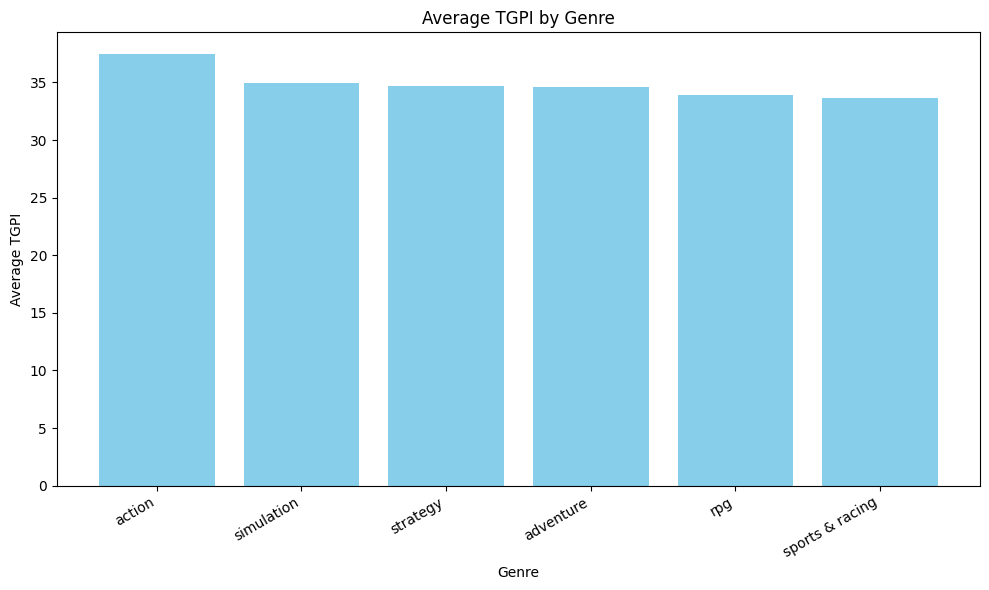

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(genre_kpi['normalized_genre'], genre_kpi['avg_tgpi'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average TGPI')
plt.title('Average TGPI by Genre')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()





Action leads in average TGPI, while other genres display relatively close performance levels

**Scatter plot of Average TGPI vs Risk (STD) + Quadrants (חלוקה לרבעים)**

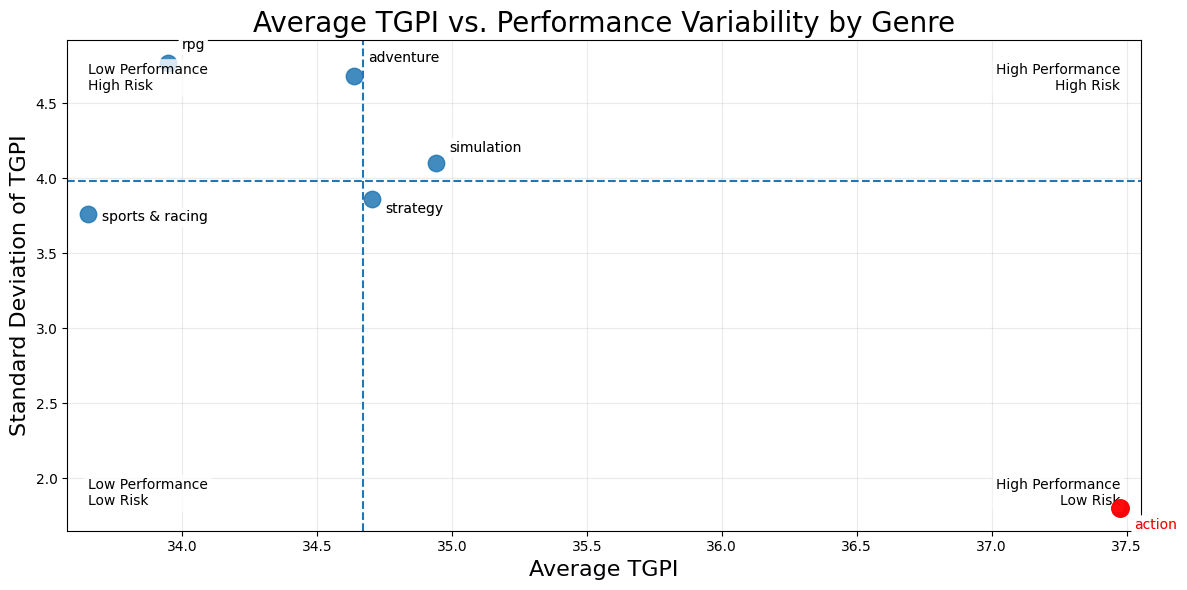

In [114]:
import matplotlib.pyplot as plt

x_col = 'avg_tgpi'
y_col = 'std_tgpi'
label_col = 'normalized_genre'

x_med = genre_kpi[x_col].median()
y_med = genre_kpi[y_col].median()

plt.figure(figsize=(12, 6))
plt.scatter(genre_kpi[x_col], genre_kpi[y_col], s=140, alpha=0.85)

# קווי חלוקה (quadrants)
plt.axvline(x_med, linestyle='--')
plt.axhline(y_med, linestyle='--')

# הסטות ידניות לתוויות כדי למנוע חפיפה
offsets = {
    'action': (10, -15),
    'simulation': (10, 8),
    'strategy': (10, -10),
    'adventure': (10, 10),
    'rpg': (10, 10),
    'sports & racing': (10, -5),
}

for _, r in genre_kpi.iterrows():
    dx, dy = offsets.get(r[label_col], (8, 8))
    plt.annotate(
        r[label_col],
        (r[x_col], r[y_col]),
        textcoords="offset points",
        xytext=(dx, dy),
        ha='left',
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none')
    )

# טקסט quadrants – בפינות, עם רקע לבן
pad_x = (genre_kpi[x_col].max() - genre_kpi[x_col].min()) * 0.02
pad_y = (genre_kpi[y_col].max() - genre_kpi[y_col].min()) * 0.05

xmin, xmax = genre_kpi[x_col].min() - pad_x, genre_kpi[x_col].max() + pad_x
ymin, ymax = genre_kpi[y_col].min() - pad_y, genre_kpi[y_col].max() + pad_y
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

kw = dict(fontsize=10, bbox=dict(boxstyle='round,pad=0.25', fc='white', alpha=0.8, ec='none'))
plt.text(xmin + pad_x, ymax - pad_y, "Low Performance\nHigh Risk", va='top', **kw)
plt.text(xmin + pad_x, ymin + pad_y, "Low Performance\nLow Risk", va='bottom', **kw)
plt.text(xmax - pad_x, ymax - pad_y, "High Performance\nHigh Risk", va='top', ha='right', **kw)
plt.text(xmax - pad_x, ymin + pad_y, "High Performance\nLow Risk", va='bottom', ha='right', **kw)

plt.title("Average TGPI vs. Performance Variability by Genre")
plt.xlabel("Average TGPI")
plt.ylabel("Standard Deviation of TGPI")
plt.grid(True, alpha=0.25)
# Highlight the "action" label and its point in red
for _, r in genre_kpi.iterrows():
    dx, dy = offsets.get(r[label_col], (8, 8))
    if r[label_col] == 'action':
        plt.annotate(
            r[label_col],
            (r[x_col], r[y_col]),
            textcoords="offset points",
            xytext=(dx, dy),
            ha='left',
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none'),
            color='red'
        )
        plt.scatter(r[x_col], r[y_col], s=160, alpha=0.95, color='red', edgecolor='red', zorder=10)
    else:
        plt.annotate(
            r[label_col],
            (r[x_col], r[y_col]),
            textcoords="offset points",
            xytext=(dx, dy),
            ha='left',
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none')
        )
plt.title("Average TGPI vs. Performance Variability by Genre", fontsize=20)
plt.xlabel("Average TGPI", fontsize=16)
plt.ylabel("Standard Deviation of TGPI", fontsize=16)
plt.tight_layout()
plt.show(block=False)


While most genres demonstrate similar average performance accompanied by higher variability, Action clearly stands out as a high-performing and consistent genre

 ### **Consistency:** 
 besides average performance (Average TGPI), it's interesting to know:
How consistent success in the genre is and whether it doesn't depend on a single game

Consistency reflects how predictable success is within a genre

In [115]:
genre_kpi['consistency_score'] = (genre_kpi['avg_tgpi']/genre_kpi['std_tgpi'])

genre_kpi.sort_values('consistency_score', ascending=False)

,normalized_genre,avg_tgpi,std_tgpi,n_games,consistency_score
0,action,37.477143,1.799511,10,20.826291
5,strategy,34.702857,3.861114,10,8.987784
4,sports & racing,33.651429,3.760188,10,8.949401
3,simulation,34.940000,4.100040,10,8.521867
1,adventure,34.637143,4.681353,10,7.398960
2,rpg,33.947143,4.771643,10,7.114351


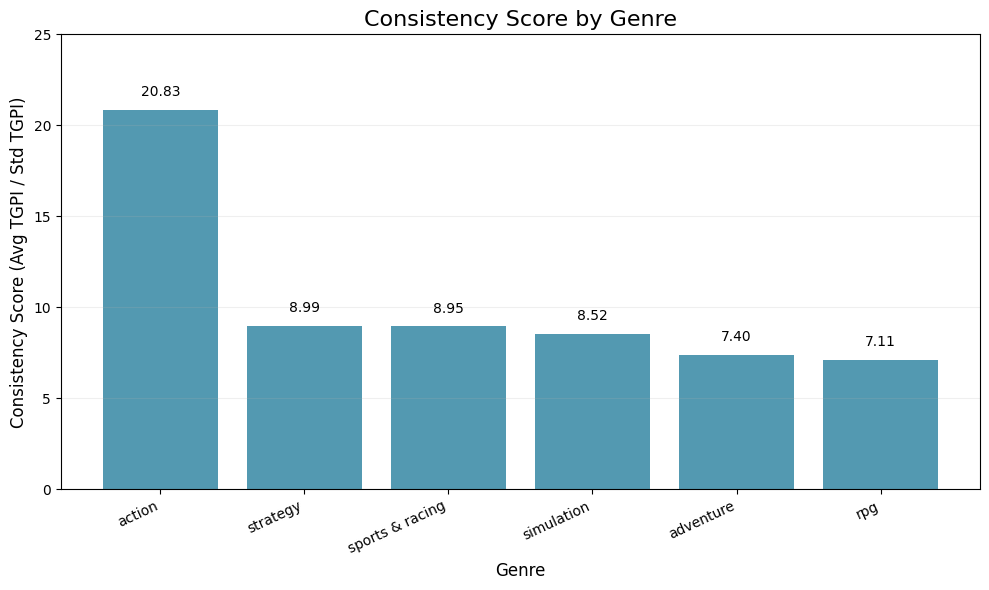

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sorted_genre_kpi = genre_kpi.sort_values('consistency_score', ascending=False)
bars = plt.bar(
    sorted_genre_kpi['normalized_genre'], 
    sorted_genre_kpi['consistency_score'], 
    color='#3587A4', 
    alpha=0.85
)
plt.title("Consistency Score by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Consistency Score (Avg TGPI / Std TGPI)", fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.ylim(0, 25)
plt.grid(axis='y', alpha=0.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.6, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



While Average TGPI reflects overall performance, the Consistency Score highlights the stability of success within each genre.
Genres with higher consistency scores demonstrate more predictable outcomes, whereas lower scores indicate greater performance volatility

### **Beyond ranking: Player Experiance & Engagment:**

### **Player Satisfaction vs Monetization:** (שביעות רצון מול מונטיזציה):
Are games that make good money also loved by players, or is there a difference between money and user experience?

Monetizaion = how game produce money? How successful is the game at turning players into revenue? 

When designing a new game, should we prioritize monetization strategies, player experience, or a balance between the two?

Monetization strength is approximated using revenue-based rankings.

Player satisfaction is measured using the overall player rating, reflecting user experience quality



In [117]:
# Converting each rank type to score:
# 1 - Splitting the rank type into 3 its metrics:
rank_pivot_df = unique_game_df.pivot_table(
    index=['game_name','normalized_genre'],
    columns='rank_type',
    values='rank',
    aggfunc='min'
).reset_index()

rank_pivot_df = rank_pivot_df.rename(columns={
    'Revenue': 'rank_revenue',
    'Sales': 'rank_sales',
    'Review': 'rank_review'
})
rank_pivot_df['normalized_genre'] = rank_pivot_df['normalized_genre'].str.replace("'","")

In [118]:
rank_pivot_df

rank_type,game_name,normalized_genre,rank_revenue,rank_review,rank_sales
0,69 balls,sports & racing,NaN,11.0,NaN
1,7 days to die,simulation,40.0,NaN,NaN
2,age of empires ii (retired),action,NaN,19.0,NaN
3,age of empires ii: definitive edition,action,36.0,NaN,NaN
4,age of wonders 4,rpg,NaN,36.0,NaN
...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0
272,wrestling empire,simulation,NaN,27.0,NaN
273,wwe 2k24,simulation,NaN,NaN,13.0
274,yakuza 0,action,NaN,37.0,NaN


In [119]:
# merge the column overall_player_rating_numeric:
kpi3_df = rank_pivot_df.merge(
    unique_game_df[['game_name', 'overall_player_rating_numeric']],
    on='game_name',
    how='left')

In [120]:
kpi3_df

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric
0,69 balls,sports & racing,NaN,11.0,NaN,6.0
1,7 days to die,simulation,40.0,NaN,NaN,6.0
2,age of empires ii (retired),action,NaN,19.0,NaN,7.0
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0
4,age of wonders 4,rpg,NaN,36.0,NaN,6.0
...,...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0,4.0
272,wrestling empire,simulation,NaN,27.0,NaN,7.0
273,wwe 2k24,simulation,NaN,NaN,13.0,4.0
274,yakuza 0,action,NaN,37.0,NaN,7.0


In [121]:
# defining monetization:
# Scale reversal - high score = better:
kpi3_df['monetization_score'] = (
    41 - kpi3_df['rank_revenue']
)
print('After scale revesal, now higher score is better, the higher - the better')

After scale revesal, now higher score is better, the higher - the better


In [122]:
kpi3_df

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric,monetization_score
0,69 balls,sports & racing,NaN,11.0,NaN,6.0,NaN
1,7 days to die,simulation,40.0,NaN,NaN,6.0,1.0
2,age of empires ii (retired),action,NaN,19.0,NaN,7.0,NaN
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0,5.0
4,age of wonders 4,rpg,NaN,36.0,NaN,6.0,NaN
...,...,...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0,4.0,NaN
272,wrestling empire,simulation,NaN,27.0,NaN,7.0,NaN
273,wwe 2k24,simulation,NaN,NaN,13.0,4.0,NaN
274,yakuza 0,action,NaN,37.0,NaN,7.0,NaN


In [123]:
#for comapring between the monetization score and overall player rating numeric it is 
# important that only games with data for both of these paramteres will remain:
kpi3_clean = kpi3_df[kpi3_df['monetization_score'].notna() & 
kpi3_df['overall_player_rating_numeric'].notna()]

kpi3_clean

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric,monetization_score
1,7 days to die,simulation,40.0,NaN,NaN,6.0,1.0
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0,5.0
6,ale & tale tavern,simulation,39.0,NaN,NaN,6.0,2.0
10,all-in-one sports vr,sports & racing,11.0,NaN,NaN,6.0,30.0
15,ark: survival ascended,adventure,29.0,NaN,NaN,3.0,12.0
23,balatro,strategy,35.0,NaN,NaN,7.0,6.0
27,black desert,rpg,37.0,NaN,NaN,4.0,4.0
32,call of duty®: black ops ii,adventure,39.0,NaN,NaN,6.0,2.0
38,carx street,simulation,32.0,NaN,NaN,3.0,9.0
39,chained together,adventure,22.0,NaN,NaN,6.0,19.0


In [124]:
#Sanity check:
kpi3_clean[['monetization_score','overall_player_rating_numeric']].describe()

,monetization_score,overall_player_rating_numeric
count,48.000000,48.00000
mean,9.062500,5.75000
std,6.475506,1.12041
min,1.000000,3.00000
25%,4.000000,6.00000
50%,8.000000,6.00000
75%,12.250000,6.00000
max,30.000000,7.00000


**Scatter plot of monetization vs player satisfaction (aka overll player rating numeric):**

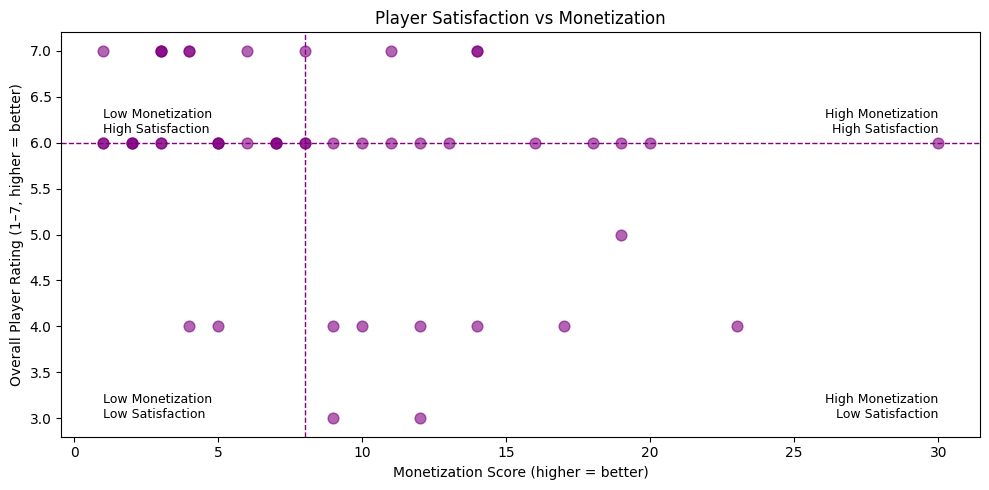

Darker areas indicate a higher concentration of games with similar monetization and player satisfaction levels


In [125]:
import matplotlib.pyplot as plt

# חישוב חציון לצירים
x_median = kpi3_clean['monetization_score'].median()
y_median = kpi3_clean['overall_player_rating_numeric'].median()

plt.figure(figsize=(10, 5))

# Scatter עם רמיזה להצטברות
plt.scatter(
    kpi3_clean['monetization_score'],
    kpi3_clean['overall_player_rating_numeric'],
    alpha=0.6,   # ← רמיזה להצטברות
    s=60
)

# קווי חציון
plt.axvline(x=x_median, linestyle='--', linewidth=1)
plt.axhline(y=y_median, linestyle='--', linewidth=1)

# כותרות וצירים
plt.title('Player Satisfaction vs Monetization')
plt.xlabel('Monetization Score (higher = better)')
plt.ylabel('Overall Player Rating (1–7, higher = better)')

# תוויות רבעים (ממוקמות בצדדים)
plt.text(
    kpi3_clean['monetization_score'].min(),
    y_median + 0.1,
    'Low Monetization\nHigh Satisfaction',
    fontsize=9,
    ha='left'
)

plt.text(
    kpi3_clean['monetization_score'].max(),
    y_median + 0.1,
    'High Monetization\nHigh Satisfaction',
    fontsize=9,
    ha='right'
)

plt.text(
    kpi3_clean['monetization_score'].min(),
    kpi3_clean['overall_player_rating_numeric'].min(),
    'Low Monetization\nLow Satisfaction',
    fontsize=9,
    ha='left'
)

plt.text(
    kpi3_clean['monetization_score'].max(),
    kpi3_clean['overall_player_rating_numeric'].min(),
    'High Monetization\nLow Satisfaction',
    fontsize=9,
    ha='right'
)

plt.tight_layout()

# Change all dots and lines to purple
for line in plt.gca().lines:
    line.set_color('purple')  # Change lines to purple

for pathcoll in plt.gca().collections:
    pathcoll.set_facecolor('purple')  # Change marker (dot) color to purple

plt.show()

print('Darker areas indicate a higher concentration of games with similar monetization and player satisfaction levels')

In [126]:
#Quadrant Threshold Calculation:
monetization_cutoff = kpi3_clean['monetization_score'].median()
satisfaction_cutoff = kpi3_clean['overall_player_rating_numeric'].median()

In [127]:
#Assigning each game to it is quadrant:
def assign_quadrant(row):
    if row['monetization_score'] >= monetization_cutoff and row['overall_player_rating_numeric'] >= satisfaction_cutoff:
        return 'High Monetization | High Satisfaction'
    elif row['monetization_score'] < monetization_cutoff and row['overall_player_rating_numeric'] >= satisfaction_cutoff:
        return 'Low Monetization | High Satisfaction'
    elif row['monetization_score'] >= monetization_cutoff and row['overall_player_rating_numeric'] < satisfaction_cutoff:
        return 'High Monetization | Low Satisfaction'
    else:
        return 'Low Monetization | Low Satisfaction'

kpi3_clean.loc[:,'quadrant'] = kpi3_clean.apply(assign_quadrant, axis=1)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_19964\4168491930.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi3_clean.loc[:,'quadrant'] = kpi3_clean.apply(assign_quadrant, axis=1)


In [128]:
quadrant_summary = (
    kpi3_clean
    .groupby('quadrant')
    .size()
    .reset_index(name='n_games')
)

# 2. חישוב סך כל המשחקים
total_games = quadrant_summary['n_games'].sum()

# 3. חישוב אחוז מכלל המשחקים
quadrant_summary['percent_of_games'] = (
    quadrant_summary['n_games'] / total_games * 100
).round(1)

quadrant_summary

,quadrant,n_games,percent_of_games
0,High Monetization | High Satisfaction,16,33.3
1,High Monetization | Low Satisfaction,9,18.8
2,Low Monetization | High Satisfaction,21,43.8
3,Low Monetization | Low Satisfaction,2,4.2


In [129]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(
    kpi3_clean['monetization_score'],
    kpi3_clean['overall_player_rating_numeric']
)

corr.round(2), p_value.round(2)


(np.float64(-0.32), np.float64(0.03))

A weak but statistically significant negative correlation (Spearman r = −0.32, p = 0.03) was found between monetization and player satisfaction, suggesting that higher monetization does not necessarily translate into a better player experience.

p value = 0.03 < 0.05 --> Statistical significance 

Meaning higher monetization strategies may come at the expense of player satisfaction, highlighting the need for balanced design decisions